# N-Queens

Problem Statement: Place N queens in a NxN chess board such that:
* No two queens are in the same row.
* No two queens are in the same column.
* No two queens are in the same diagonal.



In [27]:
import ipywidgets as widgets
num_queens= widgets.BoundedIntText(
    value=4,
    min=1,
    description='Board Size',
    continuous_update=True
)
display(num_queens)

BoundedIntText(value=4, continuous_update=True, description='Board Size', min=1)

## Encoding of N-Queens

### There are N rows in the board

In [53]:
%%writefile nqueens.lp

row(1.. n).

Overwriting nqueens.lp


### There are N columns in the board

In [54]:
%%writefile -a nqueens.lp

col(1.. n).

Appending to nqueens.lp


### N queens are placed in the chess board

In [55]:
%%writefile -a nqueens.lp

n{queen(I ,J):col(I),row(J)}n.

Appending to nqueens.lp


### No two queens are in the same column.

In [56]:
%%writefile -a nqueens.lp

:-queen(I,J),queen(I,JJ),J!= JJ .

Appending to nqueens.lp


### No two queens are in the same row.

In [57]:
%%writefile -a nqueens.lp

:-queen(I,J),queen(II,J),I!=II.

Appending to nqueens.lp


### No two queens are in the same diagonal.

In [58]:
%%writefile -a nqueens.lp

:-queen(I,J),queen(II,JJ),(I,J)!=(II,JJ),|I-II|=|J-JJ|.

Appending to nqueens.lp


## Solving

### Run Clingo from command line

In [59]:
!clingo nqueens.lp -c n=4 0

clingo version 5.4.0
Reading from nqueens.lp
Solving...
Answer: 1
row(1) row(2) row(3) row(4) col(1) col(2) col(3) col(4) queen(1,2) queen(4,3) queen(3,1) queen(2,4)
Answer: 2
row(1) row(2) row(3) row(4) col(1) col(2) col(3) col(4) queen(2,1) queen(4,2) queen(1,3) queen(3,4)
SATISFIABLE

Models       : 2
Calls        : 1
Time         : 0.002s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)
CPU Time     : 0.002s


### Using clorm

Import clorm modules

In [60]:
from clorm.clingo import Control
from clorm import IntegerField, Predicate

Define predicates for data model

In [61]:
class Queen(Predicate):
    row=IntegerField
    col=IntegerField

Computing stable models

In [62]:
ctrl = Control("0",unifier=[Queen])
ctrl.load("nqueens.lp")
n = num_queens.value
ctrl.add("base", [], "#const n= {}.".format(n))
ctrl.ground([("base",[])])
solution=[]
ctrl.solve(on_model=lambda model: solution.append(model.facts(atoms=True)))

SAT

List of Stable Models

In [63]:
solution

[{queen(4,1), queen(5,3), queen(7,2), queen(2,4), queen(6,5), queen(1,6), queen(8,8), queen(3,7)},
 {queen(4,1), queen(5,3), queen(6,5), queen(1,2), queen(7,7), queen(8,4), queen(3,6), queen(2,8)},
 {queen(4,1), queen(5,3), queen(6,5), queen(2,2), queen(1,6), queen(8,4), queen(3,7), queen(7,8)},
 {queen(8,1), queen(3,4), queen(6,5), queen(4,2), queen(1,3), queen(2,6), queen(7,7), queen(5,8)},
 {queen(4,1), queen(1,3), queen(6,5), queen(3,4), queen(2,6), queen(7,7), queen(8,2), queen(5,8)},
 {queen(6,5), queen(3,3), queen(1,2), queen(4,6), queen(7,1), queen(8,4), queen(2,7), queen(5,8)},
 {queen(6,5), queen(1,4), queen(3,3), queen(8,6), queen(4,8), queen(7,1), queen(5,2), queen(2,7)},
 {queen(2,3), queen(6,5), queen(4,2), queen(1,6), queen(7,1), queen(8,4), queen(3,7), queen(5,8)},
 {queen(4,1), queen(6,5), queen(2,2), queen(3,4), queen(8,6), queen(7,3), queen(1,7), queen(5,8)},
 {queen(2,3), queen(7,2), queen(6,5), queen(4,6), queen(3,1), queen(8,4), queen(1,7), queen(5,8)},
 {queen(2,

## Visualization of Solution

Stable models as a dataframe

In [64]:
import pandas as pd 
nq= pd.DataFrame(solution) 
nq = nq.apply(lambda x: x.sort_values(ascending=True, ignore_index= True),axis='columns')
nq.columns= ['Col {}'.format(i) for i in range(1,n+1)]
nq.index = ['Solution {}'.format(i) for i in range(1,len(nq)+1)]
nq

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8
Solution 1,"(1, 6)","(2, 4)","(3, 7)","(4, 1)","(5, 3)","(6, 5)","(7, 2)","(8, 8)"
Solution 2,"(1, 2)","(2, 8)","(3, 6)","(4, 1)","(5, 3)","(6, 5)","(7, 7)","(8, 4)"
Solution 3,"(1, 6)","(2, 2)","(3, 7)","(4, 1)","(5, 3)","(6, 5)","(7, 8)","(8, 4)"
Solution 4,"(1, 3)","(2, 6)","(3, 4)","(4, 2)","(5, 8)","(6, 5)","(7, 7)","(8, 1)"
Solution 5,"(1, 3)","(2, 6)","(3, 4)","(4, 1)","(5, 8)","(6, 5)","(7, 7)","(8, 2)"
...,...,...,...,...,...,...,...,...
Solution 88,"(1, 5)","(2, 2)","(3, 4)","(4, 6)","(5, 8)","(6, 3)","(7, 1)","(8, 7)"
Solution 89,"(1, 2)","(2, 5)","(3, 7)","(4, 1)","(5, 3)","(6, 8)","(7, 6)","(8, 4)"
Solution 90,"(1, 7)","(2, 3)","(3, 8)","(4, 2)","(5, 5)","(6, 1)","(7, 6)","(8, 4)"
Solution 91,"(1, 8)","(2, 2)","(3, 5)","(4, 3)","(5, 1)","(6, 7)","(7, 4)","(8, 6)"


### Functions for styling the solutions into chess board

#### Function to view each solution as a chess board

In [65]:
def nqueentb(sol):
  dft= pd.DataFrame(" ",index=range(1,len(sol)+1), columns=range(1,len(sol)+1))
  for soln in sol:
    dft.loc[soln.col, soln.row] = 'Q'
  return dft

#### Function to style the chess board

In [66]:
def style_nqueen_sol(i):
  cur_sol=nqueentb(nq.loc["Solution {}".format(i)])
  cur_sol_sty = cur_sol.style.set_caption('Solution {}'.format(i)).set_properties(**{'color':'red', 
                           'background-color':'#f8f8ff',
                           'border':'groove',                           
                           })
  return(cur_sol_sty)

#### Function to view a list of chess boards

In [67]:
from IPython.core.display import HTML
def multi_table(start_sol,end_sol): 
  stn = '' 
  while(start_sol<=end_sol):
    if start_sol+7<=end_sol:
      stn +=  '<table border="2" bordercolor="black"><tr >' + ''.join(['<td>' + style_nqueen_sol(i)._repr_html_() + '</td>' for i in range(start_sol, start_sol+7)])+'</tr></table>'
    else:
      stn +=  '<table border="2" bordercolor="black"><tr >' + ''.join(['<td>' + style_nqueen_sol(i)._repr_html_() + '</td>' for i in range(start_sol, end_sol+1)])+'</tr></table>'
    start_sol +=7
  return HTML(stn)

### Which solution do you want to see?

In [68]:
n_sol = widgets.IntSlider(
    value=1,
    min=1,
    max=len(nq),
    step=1,
    description='Sol. number:',
    orientation='horizontal',
    continuous_update=True
)
display(n_sol)

IntSlider(value=1, description='Sol. number:', max=92, min=1)

In [69]:
style_nqueen_sol(n_sol.value)

,1,2,3,4,5,6,7,8
1,,,,Q,,,,
2,,,,,,,Q,
3,,,,,Q,,,
4,,Q,,,,,,
5,,,,,,Q,,
6,Q,,,,,,,
7,,,Q,,,,,
8,,,,,,,,Q


### Visualize a list of chess boards

#### Starting solution number

In [45]:
start_sol = widgets.IntSlider(
    value=1,
    min=1,
    max=len(nq),
    step=1,
    description='Start',
    orientation='horizontal',
    continuous_update=True
)
display(start_sol)

IntSlider(value=1, description='Start', max=92, min=1)

#### Ending solution number

In [46]:
end_sol = widgets.IntSlider(
    value=1,
    min=start_sol.value,
    max=len(nq),
    step=1,
    description='End',
    orientation='horizontal',
    continuous_update=True
)
display(end_sol)

IntSlider(value=1, description='End', max=92, min=1)

In [51]:
multi_table(start_sol.value,end_sol.value)

,1,2,3,4,5,6,7,8
1,,,,Q,,,,
2,,,,,,,Q,
3,,,Q,,,,,
4,,,,,,,,Q
5,,Q,,,,,,
6,,,,,Q,,,
7,Q,,,,,,,
8,,,,,,Q,,
,1,2,3,4,5,6,7,8
1,Q,,,,,,,


## Statistics

In [48]:
stats = pd.DataFrame(ctrl.statistics['solving'])

In [49]:
stats

,solvers
choices,12675.0
conflicts,12398.0
conflicts_analyzed,12111.0
restarts,126.0
restarts_last,10692.0


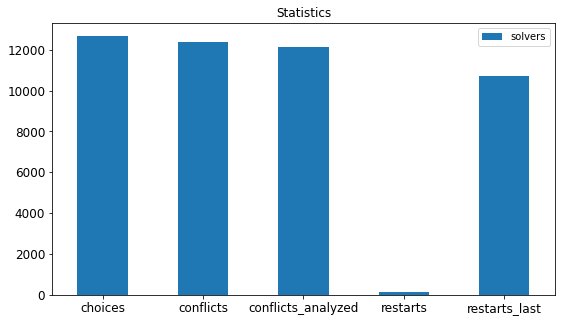

In [50]:
import matplotlib.pyplot as plt
ax = stats.plot(kind='bar', title ="Statistics", figsize=(9, 5), legend=True, fontsize=12,rot=0)
plt.show()